<a href="https://colab.research.google.com/github/HarshAhalpara-001/Complete_MachineLearning/blob/main/Supervise_Learning/Decision_Tree/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
iris=load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 

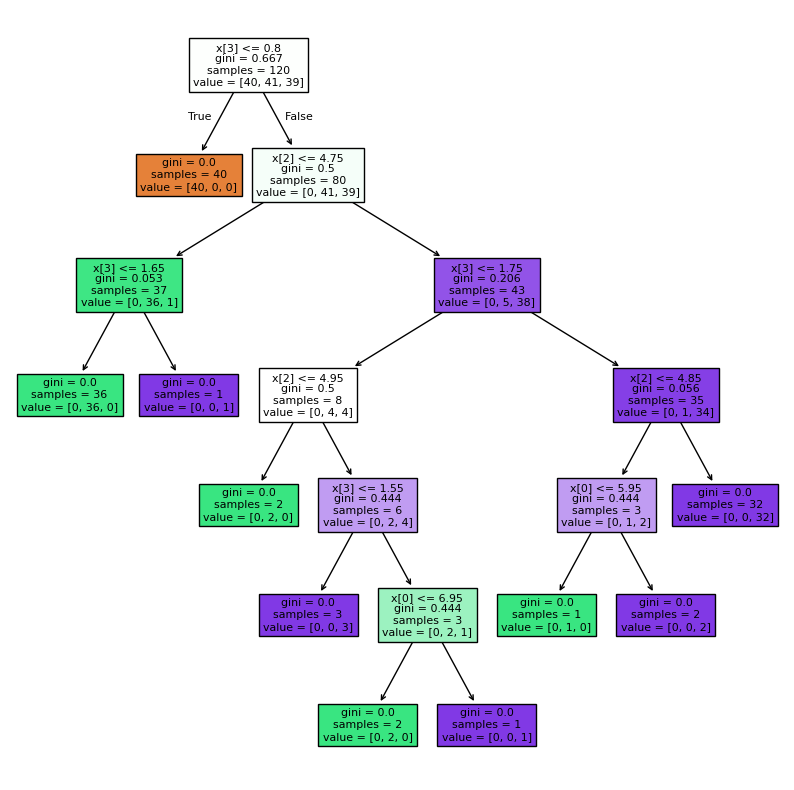

In [20]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
plt.figure(figsize=(10,10))
plot_tree(model,filled=True)

1.0


Text(50.722222222222214, 0.5, 'Truth')

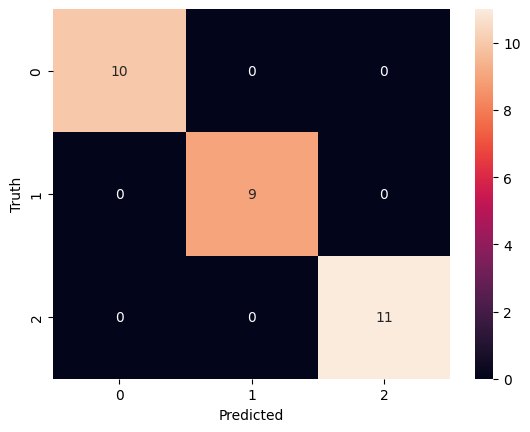

In [26]:
import seaborn as sns
print(accuracy_score(y_test,model.predict(X_test)))
# print(classification_report(y_test,model.predict(X_test)))
cm=confusion_matrix(y_test,model.predict(X_test))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

---

### Overfitting in Decision Trees

To reduce overfitting, decision trees often use pruning techniques. Two main pruning methods are:

1. **Pre-pruning (Early Stopping)**:
   - This method imposes constraints on tree growth before it fully develops. Common constraints include:
     - **Maximum Depth**: Limits the depth of the tree to prevent overly complex structures.
     - **Minimum Samples per Split**: Sets a minimum number of samples required to split a node.
     - **Minimum Samples per Leaf**: Ensures each leaf node has a minimum number of samples.
   - **Advantages**: Efficient for large datasets.
   - **Disadvantages**: It may stop tree growth prematurely, potentially missing important patterns.

2. **Post-pruning (Cost Complexity Pruning)**:
   - In this method, the tree is allowed to grow fully, and then pruning is applied based on a **cost function**.
   - **Cost Complexity Pruning** (using `ccp_alpha` parameter) prunes nodes that add less predictive value while balancing the trade-off between tree complexity and accuracy.
   - **Advantages**: Suitable for smaller datasets and allows for more fine-tuned pruning.
   - **Disadvantages**: It can be computationally intensive.

**Choosing the Right Method**:
- **Pre-pruning** is often used for larger datasets where efficiency is important, and **post-pruning** is more effective when working with smaller datasets where detailed pruning can be beneficial for model accuracy.

